In [29]:
import pickle
import pandas as pd
import numpy as np
from cmocean.cm import balance_r
import matplotlib.pyplot as pl
from seaborn import heatmap

In [2]:
% matplotlib inline

In [3]:
with open('./Dataset/aurin_v1.pkl', 'rb') as fb:
    dataset = pickle.load(fb)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51192 entries, 0 to 51191
Data columns (total 16 columns):
sample_id    51192 non-null int32
year         51192 non-null uint16
month        51192 non-null uint8
day          51192 non-null uint8
hr           51192 non-null uint8
min          51192 non-null uint8
lat          51192 non-null float64
lon          51192 non-null float64
bdepth       51086 non-null float64
depth        51188 non-null float64
Wt           47432 non-null float64
Sal          47542 non-null float64
ag412        48378 non-null float64
S275:295     2480 non-null float64
DOC          1957 non-null float64
POC          625 non-null float64
dtypes: float64(10), int32(1), uint16(1), uint8(4)
memory usage: 4.8 MB


In [11]:
df_novak = pd.read_pickle('./Dataset/novak_v1.pkl')

In [12]:
df_novak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 1 to 1325
Data columns (total 17 columns):
sample_id    1325 non-null object
year         1325 non-null object
month        1325 non-null object
day          1325 non-null object
hr           1325 non-null object
min          1325 non-null object
lat          1325 non-null object
lon          1325 non-null object
bdepth       1224 non-null object
depth        1135 non-null object
Wt           816 non-null object
Sal          997 non-null object
ag412        1207 non-null object
S275:295     1208 non-null object
DOC          1258 non-null object
POC1         1321 non-null object
POC2         1321 non-null object
dtypes: object(17)
memory usage: 176.1+ KB


In [13]:
df_novak.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 1046
Data columns (total 17 columns):
sample_id    749 non-null object
year         749 non-null object
month        749 non-null object
day          749 non-null object
hr           749 non-null object
min          749 non-null object
lat          749 non-null object
lon          749 non-null object
bdepth       749 non-null object
depth        749 non-null object
Wt           749 non-null object
Sal          749 non-null object
ag412        749 non-null object
S275:295     749 non-null object
DOC          749 non-null object
POC1         749 non-null object
POC2         749 non-null object
dtypes: object(17)
memory usage: 105.3+ KB


In [7]:
df_merged = pd.read_pickle('./Dataset/novak_aurin_merged_v1.pkl')

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52517 entries, 1 to 51191
Data columns (total 14 columns):
year        52517 non-null object
month       52517 non-null object
day         52517 non-null object
hr          52517 non-null object
min         52517 non-null object
lat         52517 non-null object
lon         52517 non-null object
bdepth      52310 non-null object
depth       52323 non-null object
Wt          48248 non-null object
Sal         48539 non-null object
ag412       49585 non-null object
S275:295    3688 non-null object
DOC         3215 non-null object
dtypes: object(14)
memory usage: 6.0+ MB


In [9]:
df_merged.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 1 to 3182
Data columns (total 14 columns):
year        1146 non-null object
month       1146 non-null object
day         1146 non-null object
hr          1146 non-null object
min         1146 non-null object
lat         1146 non-null object
lon         1146 non-null object
bdepth      1146 non-null object
depth       1146 non-null object
Wt          1146 non-null object
Sal         1146 non-null object
ag412       1146 non-null object
S275:295    1146 non-null object
DOC         1146 non-null object
dtypes: object(14)
memory usage: 134.3+ KB


In [26]:
df_merged.dropna()[['lat', 'lon']].min(axis=0)

lat    -59.5018
lon   -149.9970
dtype: float64

In [27]:
df_merged.dropna()[['lat', 'lon']].max(axis=0)

lat    44.233183
lon    95.006200
dtype: float64

In [36]:
df_ms = df_merged.dropna().loc[:,'lat':]

In [46]:
df_merged = df_merged.astype('f8')

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52517 entries, 1 to 51191
Data columns (total 14 columns):
year        52517 non-null float64
month       52517 non-null float64
day         52517 non-null float64
hr          52517 non-null float64
min         52517 non-null float64
lat         52517 non-null float64
lon         52517 non-null float64
bdepth      52310 non-null float64
depth       52323 non-null float64
Wt          48248 non-null float64
Sal         48539 non-null float64
ag412       49585 non-null float64
S275:295    3688 non-null float64
DOC         3215 non-null float64
dtypes: float64(14)
memory usage: 6.0 MB


In [48]:
df_ms = df_merged.dropna().loc[:, 'lat':]

In [49]:
df_ms.corr()

,lat,lon,bdepth,depth,Wt,Sal,ag412,S275:295,DOC
lat,1.000000,-0.658293,-0.835743,0.078590,-0.045708,-0.154797,0.218019,-0.460882,0.187867
lon,-0.658293,1.000000,0.543981,-0.001978,-0.101355,0.161646,-0.201686,0.305139,-0.242111
bdepth,-0.835743,0.543981,1.000000,0.010692,0.064702,0.258251,-0.302565,0.523498,-0.300796
depth,0.078590,-0.001978,0.010692,1.000000,-0.274197,0.262514,-0.221960,0.044454,-0.377358
Wt,-0.045708,-0.101355,0.064702,-0.274197,1.000000,-0.172628,0.031742,0.265842,0.406752
Sal,-0.154797,0.161646,0.258251,0.262514,-0.172628,1.000000,-0.609227,0.407302,-0.666214
ag412,0.218019,-0.201686,-0.302565,-0.221960,0.031742,-0.609227,1.000000,-0.670775,0.739398
S275:295,-0.460882,0.305139,0.523498,0.044454,0.265842,0.407302,-0.670775,1.000000,-0.447289
DOC,0.187867,-0.242111,-0.300796,-0.377358,0.406752,-0.666214,0.739398,-0.447289,1.000000


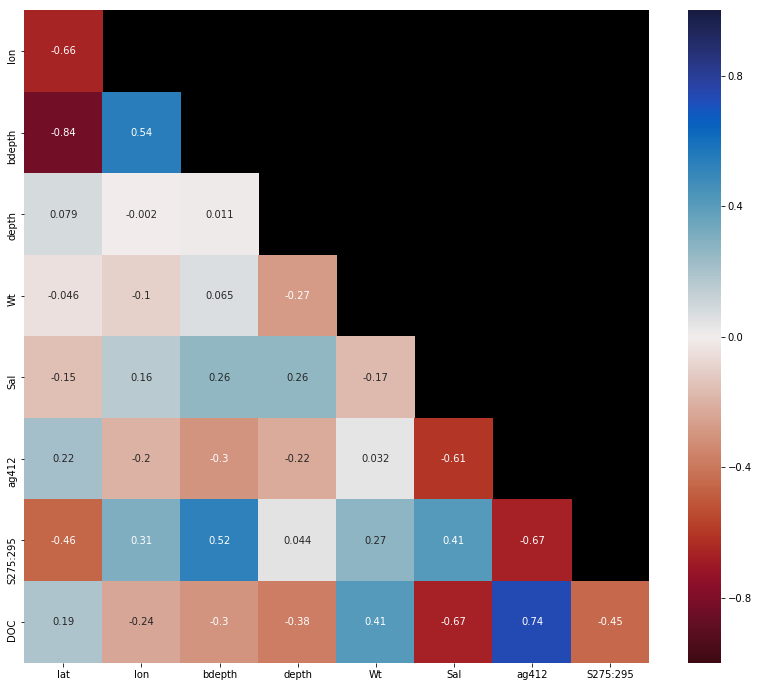

In [51]:
_, ax = pl.subplots(figsize=(14, 12))
heatmap(df_ms.corr().iloc[1:, :-1], vmin=-1, vmax=1, ax=ax,
       annot=True, cmap=balance_r, mask=np.triu(np.ones([df_ms.shape[1]-1]*2), k=1))
ax.set_facecolor('k')